In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [2]:
!pip install --upgrade pip

In [3]:
!pip install cap
!pip install optbinning
# !pip install python-pptx

In [4]:
import os

#global variables setting
def globalvariables (dataset_number):
  assert 1<= dataset_number <=3, 'dataset number has to be between 1 and 3'
  path = "C:/Users/user/Desktop/binning/"
  dataset_path = f"{path}dataset_{dataset_number}_original.csv"
  results_path = f"{path}dataset_{dataset_number}_results/"
  if not os.path.exists(results_path):
    os.makedirs(results_path)
  dataset_text = "Optimal Binning Dataset " + str(dataset_number)

  return path, dataset_path, results_path, dataset_number, dataset_text

path, dataset_path, results_path, dataset_number, dataset_text = globalvariables(1) ## insert number of each dataset
VAR_BINNING = True

In [5]:
import pandas as pd
# load the dataset into a pandas dataframe
df = pd.read_csv(dataset_path)

#################ONLY FOR DATASET 3######################################
if dataset_number == 3:
    df['RiskPerformance'] = df['RiskPerformance'].map({ 'Good': 0, 'Bad': 1})

# identify the data types of each column in the dataframe
dtypes = df.dtypes
print(df.shape)

# extract the names of the continuous variables
continuous_vars = []
for col in df.columns:
    if dtypes[col] == "float64" or dtypes[col] == "int64":
        continuous_vars.append(col)

# create a new dataframe containing only the continuous variables
df_continuous = df[continuous_vars]
print(df_continuous.shape)

(247032, 250)
(247032, 250)


Countries HomeCredit Bank operates in:
- Czech Republic
- Slovakia
- Kazakhstan
- China
- Vietnam
- India
- Indonesia
- Philippines

Dataset is from 2018 but it was not possible to obtain the interest rates for this year for all countries for free, that's why we approximated with the interest rate 2018 in Czech Republic which was around 0.9%.

The source for this rate is: https://data.worldbank.org/indicator/FR.INR.RINR?locations=CZ

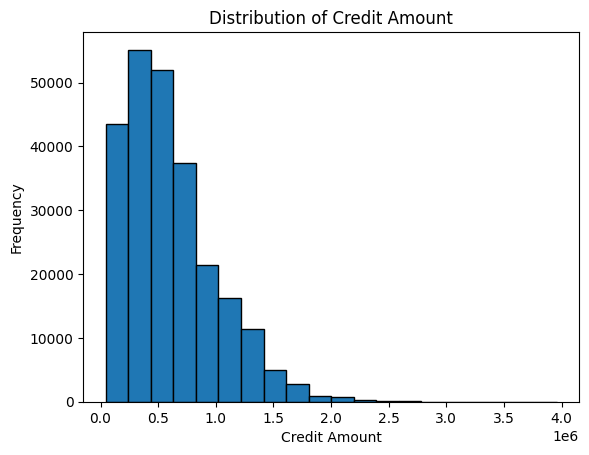

In [6]:
if dataset_number == 1:

  import matplotlib.pyplot as plt

  # Create a figure and axis
  fig, ax = plt.subplots()

  # Plot the distribution using a histogram
  ax.hist(df['AMT_CREDIT'], bins=20, edgecolor='black')

  # Set labels and title
  ax.set_xlabel('Credit Amount')
  ax.set_ylabel('Frequency')
  ax.set_title('Distribution of Credit Amount')
  
  # Show the plot
  plt.show()

In [7]:
if dataset_number == 1:
  # Calculate the 99% quantile value
  quantile_99 = df['AMT_CREDIT'].quantile(0.99)

  # Exclude values above the 99% quantile
  df_no_outliers = df[df['AMT_CREDIT'] <= quantile_99]

  # Calculate the mean without the top 1% quantile values
  mean_no_outliers = df_no_outliers['AMT_CREDIT'].mean()

  print("Mean (with outliers):", df['AMT_CREDIT'].mean())
  print("Mean (without top 1% quantile):", mean_no_outliers)

Mean (with outliers): 598463.1846036142
Mean (without top 1% quantile): 585947.0281149338


In [8]:
if dataset_number == 1:
  cost_for_fn = mean_no_outliers

  interest_rate = 0.9
  cost_for_fp = df['AMT_CREDIT'].mean() * interest_rate / 100

  cost_m = [[0, cost_for_fp],
            [cost_for_fn, 0]]

In [9]:
cost_m = [[0, 5386.168661432527], [585947.0281149338, 0]]

In [10]:
def describex(data):
    data = pd.DataFrame(data)
    stats = data.describe()
    skewness = data.skew()
    kurtosis = data.kurtosis()
    skewness_df = pd.DataFrame({'skewness':skewness}).T
    kurtosis_df = pd.DataFrame({'kurtosis':kurtosis}).T
    pd.concat([kurtosis_df,skewness_df,stats])
    return stats
  
describex(df_continuous)

,SK_ID_CURR,day_to_actual_payment_count,max_days_of_delay,nummber_of_applications,Consumer loans,Cash loans,Revolving loans,XNA,Approved,Refused,...,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
count,247032.000000,247032.000000,247032.000000,247032.000000,247032.000000,247032.000000,247032.000000,247032.000000,247032.000000,247032.000000,...,247032.000000,247032.000000,247032.000000,247032.000000,247032.000000,247032.000000,247032.000000,247032.000000,247032.000000,247032.000000
mean,278155.858618,27.743976,38.293254,4.998612,2.223696,2.217389,0.556406,0.001121,3.123413,0.876676,...,0.039218,0.004947,0.003991,0.007363,0.005611,0.005238,0.723720,0.210390,0.017714,0.007691
std,102862.182082,24.366741,29.478101,4.218016,1.844395,3.291494,1.020010,0.036477,2.147287,1.851184,...,0.194113,0.070159,0.063051,0.085494,0.074694,0.072186,0.447158,0.407586,0.131911,0.087362
min,100002.000000,0.000000,-25.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189000.500000,11.000000,23.000000,2.000000,1.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278094.500000,20.000000,32.000000,4.000000,2.000000,1.000000,0.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,367318.250000,37.000000,44.000000,7.000000,3.000000,3.000000,1.000000,0.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,456255.000000,245.000000,3189.000000,73.000000,45.000000,60.000000,31.000000,3.000000,27.000000,68.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [11]:
%%capture cap --no-stderr
#del cap

#the first dataset is called df.
from sklearn.model_selection import train_test_split

#handling the target column.
if dataset_number == 1:
    target='TARGET'
elif dataset_number == 2:
    target='default payment next month'
elif dataset_number == 3:
    target='RiskPerformance'

X = df.loc[:,df.columns.drop(target)]
y = df.loc[:,target]

X_train, X_remainder, y_train, y_remainder = train_test_split(X, y, test_size=0.4, random_state=0)
X_test, X_validate, y_test, y_validate = train_test_split(X_remainder, y_remainder, test_size=0.5, random_state=0)

train_count = len(X_train)
test_count = len(X_test)
validate_count = len(X_validate)

total_count = len(X)
train_percent = (train_count / total_count) * 100
test_percent = (test_count / total_count) * 100
validate_percent = (validate_count / total_count) * 100

print(f"Train: {train_percent:.2f}% ({train_count} samples)")
print(f"Test: {test_percent:.2f}% ({test_count} samples)")
print(f"Validate: {validate_percent:.2f}% ({validate_count} samples)")

In [12]:
with open(f"{results_path}train_test_validate_split.txt", 'w') as f:
    f.write(str(cap))

In [13]:
#!rm -rf figs
# !rmdir /s figs -y

In [15]:
%%capture cap --no-stderr
if VAR_BINNING == True:
  #del cap

  from optbinning import ContinuousOptimalBinning, OptimalBinning
  import os
  import re

  dict_tab = {}
  dict_woe_plot = {}
  dict_er_plot = {}
  dict_qs = {}
  dict_gini = {}
  direc = results_path + "binning_plots" #for google colab, change to "./figs" to create locally.
  if not os.path.exists(direc):
      os.makedirs(direc)
  os.makedirs(direc, exist_ok=True)

  #fitting the binner ONLY using X_train
  for column in X_train.columns:
      plot_path = ''

      binning = OptimalBinning(name=column, solver="cp", dtype="numerical", monotonic_trend="auto_asc_desc")
      binning.fit(X_train[column].values, y_train.values)
      #print(binning.status)

      binning_table = binning.binning_table #PPT
      tab = binning_table.build()#creating the binning table
      dict_tab.update({column:tab})#insert the table on the dictionary for X column

      #########################################################
      ####################    PLOTS     #######################
      if re.search("/", column):
          # Remove invalid characters from column name to use as filename
          plot_filename_woe = re.sub(r'[<>:"/\\|?*]', "", column) + '_WOE.png'
      else:
          plot_filename_woe = column + '_WOE.png'

      plot_path_woe = os.path.join(direc, plot_filename_woe)
      binning_table.plot(metric="woe", savefig=plot_path_woe) #show_bin_labels=True, to show bin labels.

      if re.search("/", column):
          # Remove invalid characters from column name to use as filename
          plot_filename_er = re.sub(r'[<>:"/\\|?*]', "", column) + '_ER.png'
      else:
          plot_filename_er = column + '_ER.png'

      plot_path_er = os.path.join(direc, plot_filename_er)

      binning_table.plot(metric="event_rate", savefig=plot_path_er)

      dict_woe_plot.update({column: plot_path_woe})
      dict_er_plot.update({column: plot_path_er})

      binning_table.analysis()
      dict_qs.update({column:round(binning_table.quality_score*1000, 2)})
      dict_gini.update({column:round(binning_table.gini, 5)})

  #transformations
  X_train_binned = pd.DataFrame()
  for column in X_train.columns:
      binning = OptimalBinning(name=column, solver="cp", dtype="numerical", monotonic_trend="auto_asc_desc")
      binning.fit(X_train[column].values, y_train.values)
      X_train_binned[column] = binning.transform(X_train[column].values)

  # Applying binning transformation on X_test
  X_test_binned = pd.DataFrame()
  for column in X_test.columns:
      binning = OptimalBinning(name=column, solver="cp", dtype="numerical", monotonic_trend="auto_asc_desc")
      binning.fit(X_train[column].values, y_train.values)
      X_test_binned[column] = binning.transform(X_test[column].values)

  # Applying binning transformation on X_validate
  X_val_binned = pd.DataFrame()
  for column in X_validate.columns:
      binning = OptimalBinning(name=column, solver="cp", dtype="numerical", monotonic_trend="auto_asc_desc")
      binning.fit(X_train[column].values, y_train.values)
      X_val_binned[column] = binning.transform(X_validate[column].values)

C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_binned[column] = binning.transform(X_train[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_binned[column] = binning.transform(X_train[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_binned[column] = binning.transform(X_train[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_binned[column] = binning.transform(X_train[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_binned[column] = binning.transform(X_train[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_binned[column] = binning.transform(X_train[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_binned[column] = binning.transform(X_train[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_binned[column] = binning.transform(X_train[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_binned[column] = binning.transform(X_train[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_binned[column] = binning.transform(X_train[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_binned[column] = binning.transform(X_train[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_binned[column] = binning.transform(X_train[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` m

C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:63: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_train_binned[column] = binning.transform(X_train[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_binned[column] = binning.transform(X_test[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` man

C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_binned[column] = binning.transform(X_test[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_binned[column] = binning.transform(X_test[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_binned[column] = binning.transform(X_test[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_binned[column] = binning.transform(X_test[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_binned[column] = binning.transform(X_test[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_binned[column] = binning.transform(X_test[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_binned[column] = binning.transform(X_test[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_binned[column] = binning.transform(X_test[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_binned[column] = binning.transform(X_test[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_binned[column] = binning.transform(X_test[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_binned[column] = binning.transform(X_test[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:70: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_test_binned[column] = binning.transform(X_test[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many 

C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_val_binned[column] = binning.transform(X_validate[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_val_binned[column] = binning.transform(X_validate[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert`

C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_val_binned[column] = binning.transform(X_validate[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_val_binned[column] = binning.transform(X_validate[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert`

C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_val_binned[column] = binning.transform(X_validate[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_val_binned[column] = binning.transform(X_validate[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert`

C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_val_binned[column] = binning.transform(X_validate[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_val_binned[column] = binning.transform(X_validate[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert`

C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_val_binned[column] = binning.transform(X_validate[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_val_binned[column] = binning.transform(X_validate[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert`

C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_val_binned[column] = binning.transform(X_validate[column].values)
C:\Users\user\AppData\Local\Temp\ipykernel_14516\1009377476.py:77: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  X_val_binned[column] = binning.transform(X_validate[column].values)


In [16]:
if VAR_BINNING == True:
  with open(f"{results_path}binning_results.txt", 'w') as f:
      f.write(str(cap))

In [17]:
if VAR_BINNING == True:

  pd.set_option('display.max_rows', None)  # Show all rows
  pd.set_option('display.max_columns', None)
  print(X_train_binned.head())

   SK_ID_CURR  day_to_actual_payment_count  max_days_of_delay  \
0    0.003935                     0.192322          -0.027826   
1    0.003935                     0.192322           0.024297   
2    0.003935                    -0.062381          -0.027826   
3    0.003935                     0.192322          -0.027826   
4    0.003935                    -0.163894          -0.031401   

   nummber_of_applications  Consumer loans  Cash loans  Revolving loans  \
0                -0.106133        0.153042   -0.000091        -0.380405   
1                -0.281836        0.153042   -0.244489         0.116868   
2                 0.033678       -0.081015   -0.028261         0.116868   
3                -0.106133       -0.081015   -0.244489         0.116868   
4                 0.047450       -0.081015    0.077099         0.116868   

            XNA  Approved   Refused  Canceled  Unused offer  \
0  2.220446e-16  0.190855 -0.080871 -0.124921  2.220446e-16   
1  2.220446e-16  0.206011 -0.246

In [18]:
if VAR_BINNING == True:

  with open(f"{results_path}X_train_binned_head.txt", 'w') as f:
      f.write(str(cap))

# TRAINING

In [23]:
!pip3 install cuda
!pip install shap
!pip install scikit-plot

ERROR: Could not find a version that satisfies the requirement cuda (from versions: none)
ERROR: No matching distribution found for cuda


  Using cached shap-0.41.0.tar.gz (380 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached tqdm-4.65.0-py3-none-any.whl (77 kB)
  Using cached slicer-0.0.7-py3-none-any.whl (14 kB)
  Using cached numba-0.57.0-cp311-cp311-win_amd64.whl (2.6 MB)
  Using cached cloudpickle-2.2.1-py3-none-any.whl (25 kB)
  Using cached llvmlite-0.40.1rc1-cp311-cp311-win_amd64.whl (27.7 MB)
Failed to build shap


  error: subprocess-exited-with-error
  
  exit code: 1
  
  [119 lines of output]
  The nvcc binary could not be located in your $PATH. Either  add it to your path, or set $CUDAHOME to enable CUDA
  Error building cuda module: TypeError('cannot unpack non-iterable NoneType object')
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-311
  creating build\lib.win-amd64-cpython-311\shap
  copying shap\datasets.py -> build\lib.win-amd64-cpython-311\shap
  copying shap\links.py -> build\lib.win-amd64-cpython-311\shap
  copying shap\_explanation.py -> build\lib.win-amd64-cpython-311\shap
  copying shap\_serializable.py -> build\lib.win-amd64-cpython-311\shap
  copying shap\__init__.py -> build\lib.win-amd64-cpython-311\shap
  creating build\lib.win-amd64-cpython-311\shap\explainers
  copying shap\explainers\mimic.py -> build\lib.win-amd64-cpython-311\shap\explainers
  copying shap\explainers\pytree.py -> build\lib.win-amd64-cpytho

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import shap

from scipy.stats import ks_2samp
import scikitplot as skplt

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.calibration import calibration_curve
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, auc, classification_report,  confusion_matrix, ConfusionMatrixDisplay, make_scorer, PrecisionRecallDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold, train_test_split
from sklearn.naive_bayes import GaussianNB

from xgboost import XGBClassifier

In [ ]:
# Helper function that calculates Confusion Matrix, Precision-Recall Curve and ROC and plots them
def plot_cm_pr_roc(y_test, y_pred, title):
  fig = plt.figure(figsize=(12, 8))
  ax1 = fig.add_subplot(2, 2, 1)
  ax2 = fig.add_subplot(2, 2, 2)
  ax3 = fig.add_subplot(2, 2, 3)

  ax1.set_title('Confusion Matrix')
  disp_cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=ax1)

  ax2.set_title('Precision-Recall Curve')
  disp_pr = PrecisionRecallDisplay.from_predictions(y_test, y_pred, ax=ax2)

  ax3.set_title('Receiver Operating Characteristic (ROC)')
  fpr, tpr, thresholds = roc_curve(y_test, y_pred)
  roc_auc = auc(fpr, tpr)
  ax3.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  ax3.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  ax3.set_xlim([0.0, 1.0])
  ax3.set_ylim([0.0, 1.05])
  ax3.set_xlabel('False Positive Rate')
  ax3.set_ylabel('True Positive Rate')
  ax3.legend(loc="lower right")

  fig.subplots_adjust(wspace=0.4, hspace=0.4)
  fig.suptitle(title.upper(), fontsize=16)

  plt.savefig(f"{results_path}{title}.png")

  plt.show()

In [ ]:
def plot_calibration_curve_and_ks(y_test, y_prob, title):
    fraction_of_positives, mean_predicted_value = calibration_curve(y_test.values, y_prob[:,1], n_bins=10)

    fig = plt.figure(figsize=(12, 4))

    ax1 = fig.add_subplot(1, 2, 1)
    ax2 = fig.add_subplot(1, 2, 2)

    # Plotting the calibration curve
    ax1.plot(mean_predicted_value, fraction_of_positives, 's-', label='Calibration Curve')
    ax1.plot([0, 1], [0, 1], '--', color='gray', label='Perfectly Calibrated')
    ax1.set_xlabel('Mean Predicted Value')
    ax1.set_ylabel('Fraction of Positives')
    ax1.set_title('Calibration Plot')
    ax1.legend(loc='lower right')

    skplt.metrics.plot_ks_statistic(y_test, y_prob, ax=ax2)

    fig.subplots_adjust(wspace=0.4)
    fig.suptitle(title.upper(), fontsize=16)

    plt.savefig(f"{results_path}{title}.png")

    plt.show()

In [ ]:
def evaluate_ks_and_roc_auc(y_test, y_prob):
    # Unite both visions to be able to filter
    df = pd.DataFrame()
    df['real'] = y_test
    df['proba'] = y_prob[:, 1]
    
    # Recover each class
    class0 = df[df['real'] == 0]
    class1 = df[df['real'] == 1]
    
    ks = ks_2samp(class0['proba'], class1['proba'])
    roc_auc = roc_auc_score(df['real'] , df['proba'])
    
    print(f"KS: {ks.statistic:.4f} (p-value: {ks.pvalue:.3e})")
    print(f"ROC AUC: {roc_auc:.4f}")
    return ks.statistic, roc_auc

In [ ]:
def gini_normalized(y_test, y_pred):
    """
    Simple normalized Gini based on Scikit-Learn's roc_auc_score
    copied from here: https://www.kaggle.com/code/mathcass/tips-for-using-scikit-learn-for-evaluation
    """
    gini = lambda t, p: 2 * roc_auc_score(t, p) - 1
    return gini(y_test, y_pred) / gini(y_test, y_test)

In [ ]:
# Create models
lr_model = LogisticRegression()
rf_model = RandomForestClassifier()
xgb_model = XGBClassifier()
nb_model = GaussianNB()
dt_model = DecisionTreeClassifier()

names = ['logistic regression', 'gaussian naive bayes', 'random forest', 'XGB', 'decision tree']
classifiers = [lr_model,
               nb_model,
               rf_model,
               xgb_model,
               dt_model]
selected_training_features_per_model = []

In [ ]:
%%time

%%capture cap --no-stderr
del cap

# Select Top 20 Features for each model, took 24 min for smallest dataset
def select_top_features(model, X_train, y_train, n_features):
    sfs = SequentialFeatureSelector(estimator=model, scoring='roc_auc', n_features_to_select=n_features)
    sfs.fit(X_train, y_train)
    selected_features = X_train.columns[sfs.get_support()].tolist()
    return selected_features


if VAR_BINNING == True:
  for name, clf in zip(names, classifiers):
      selected_features = select_top_features(clf, X_train_binned, y_train, 20)
      selected_training_features_per_model.append(selected_features)

      print(f"Selected Features ({name}):")
      print(selected_features)

else:
  for name, clf in zip(names, classifiers):
      selected_features = select_top_features(clf, X_train, y_train, 20)
      selected_training_features_per_model.append(selected_features)

      print(f"Selected Features ({name}):")
      print(selected_features)

In [ ]:
with open(f"{results_path}selected_features.txt", 'w') as f:
    f.write(str(cap))

In [ ]:
# For dataset 2:
#selected_training_features_per_model = [
#    ['LIMIT_BAL', 'PAY_0', 'PAY_5', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'worst_status', 'mean_status', 'ID', 'SEX_2', 'EDUCATION_2', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_2', 'MARRIAGE_3'],
#    ['LIMIT_BAL', 'PAY_0', 'BILL_AMT1', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT6', 'worst_status', 'mean_status', 'ID', 'SEX_2', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
#    ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'worst_status', 'money_difference', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
#    ['LIMIT_BAL', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_5', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT6', 'PAY_AMT1', 'worst_status', 'mean_status', 'money_difference', 'SEX_2', 'EDUCATION_1', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3'],
#    ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_5', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'worst_status', 'money_difference', 'SEX_2', 'EDUCATION_1', 'EDUCATION_2', 'EDUCATION_3', 'EDUCATION_4', 'EDUCATION_5', 'EDUCATION_6', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3']
#]

In [ ]:
# Train each model with the above selected features
if VAR_BINNING == True:
  for name, clf, selected_features in zip(names, classifiers, selected_training_features_per_model):
      clf.fit(X_train_binned[selected_features], y_train)
      
else:
   for name, clf, selected_features in zip(names, classifiers, selected_training_features_per_model):
      clf.fit(X_train[selected_features], y_train)

In [ ]:
%%time

%%capture cap --no-stderr
del cap

if VAR_BINNING == True:
  # make binary classification without probabilities on test set for first version of trained models
  for name, clf, selected_features in zip(names, classifiers, selected_training_features_per_model):
      y_pred = clf.predict(X_test_binned[selected_features])
      plot_title = name + " binary training"
      plot_cm_pr_roc(y_test, y_pred, plot_title)
      print(classification_report(y_test, y_pred, target_names=['Good Risk Performance', 'Bad Risk Performance']))
      print(f"Gini Coefficient: {gini_normalized(y_test, y_pred)}")
      
      conf_m = confusion_matrix(y_test, y_pred).T
      print(conf_m)
      print(np.sum(conf_m * cost_m))

else:
  for name, clf, selected_features in zip(names, classifiers, selected_training_features_per_model):
      y_pred = clf.predict(X_test[selected_features])
      plot_title = name + " binary training"
      plot_cm_pr_roc(y_test, y_pred, plot_title)
      print(classification_report(y_test, y_pred, target_names=['Good Risk Performance', 'Bad Risk Performance']))
      print(f"Gini Coefficient: {gini_normalized(y_test, y_pred)}")
      
      conf_m = confusion_matrix(y_test, y_pred).T
      print(conf_m)
      print(np.sum(conf_m * cost_m))

In [ ]:
with open(f"{results_path}training_results.txt", 'w') as f:
    f.write(str(cap))

# Hyperparameter Tuning

Except for the Naive Bayes model we use a gridsearch approach to find hyperparameters for all our used models:
- Decision tree
- Logistic Regression
- Naive Bayes
- Random forest
- XGBoost

Code snippets used from: https://machinelearningmastery.com/hyperparameters-for-classification-machine-learning-algorithms/

In [ ]:
# create gini scorer that can be used for validation scoring
gini_score = make_scorer(gini_normalized, greater_is_better=True)

## Logistic Regression - Hyperparameters

In [ ]:
%%time

%%capture cap --no-stderr
del cap

# define models and parameters
model = lr_model
solvers = ['newton-cg', 'lbfgs', 'liblinear']

penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)

grid_search = GridSearchCV(estimator=model, param_grid=grid, scoring=gini_score, cv=5)

if VAR_BINNING == True:
  grid_result_lr = grid_search.fit(X_val_binned, y_validate)

else:
  grid_result_lr = grid_search.fit(X_validate, y_validate)

# summarize results
print("Best: %f using %s" % (grid_result_lr.best_score_, grid_result_lr.best_params_))
means = grid_result_lr.cv_results_['mean_test_score']
stds = grid_result_lr.cv_results_['std_test_score']
params = grid_result_lr.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
with open(f"{results_path}logistic_regression_hp.txt", 'w') as f:
    f.write(str(cap))

## Random Forest - Hyperparameters

In [ ]:
%%time

%%capture cap --no-stderr
del cap

# define models and parameters
model = rf_model
n_estimators = [10, 100, 1000]
max_features = ['sqrt', 'log2']
max_depth = [10, 15]

# define grid search
grid = dict(n_estimators=n_estimators, max_depth=max_depth, max_features=max_features)

grid_search = GridSearchCV(estimator=model, param_grid=grid, scoring=gini_score, cv=5)

if VAR_BINNING == True:
  grid_result_rf = grid_search.fit(X_val_binned, y_validate)

else:
  grid_result_rf = grid_search.fit(X_validate, y_validate)


# summarize results
print("Best: %f using %s" % (grid_result_rf.best_score_, grid_result_rf.best_params_))
means = grid_result_rf.cv_results_['mean_test_score']
stds = grid_result_rf.cv_results_['std_test_score']
params = grid_result_rf.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
with open(f"{results_path}random_forest_hp.txt", 'w') as f:
    f.write(str(cap))

## XGBoost - Hyperparameters

In [ ]:
%%time

%%capture cap --no-stderr
del cap

# define models and parameters
model = xgb_model

# Define the parameter grid for tuning
param_grid = {
    'max_depth': [10, 15],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [100, 200, 300],
}

# Perform grid search cross-validation to tune the hyperparameters
grid_result_xgb = GridSearchCV(model, param_grid, scoring=gini_score, cv=5)

if VAR_BINNING == True:
  grid_result_xgb = grid_search.fit(X_val_binned, y_validate)

else:
  grid_result_xgb = grid_search.fit(X_validate, y_validate)

# summarize results
print("Best: %f using %s" % (grid_result_xgb.best_score_, grid_result_xgb.best_params_))
means = grid_result_xgb.cv_results_['mean_test_score']
stds = grid_result_xgb.cv_results_['std_test_score']
params = grid_result_xgb.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
with open(f"{results_path}xgb_hp.txt", 'w') as f:
    f.write(str(cap))

## Decision Tree - Hyperparameters

In [ ]:
%%time

%%capture cap --no-stderr
del cap

# define models and parameters
model = dt_model

# Define the parameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

# Perform grid search cross-validation to tune the hyperparameters
grid_result_dt = GridSearchCV(model, param_grid, scoring=gini_score, cv=5)

if VAR_BINNING == True:
  grid_result_dt = grid_search.fit(X_val_binned, y_validate)

else:
  grid_result_dt = grid_search.fit(X_validate, y_validate)

# summarize results
print("Best: %f using %s" % (grid_result_dt.best_score_, grid_result_dt.best_params_))
means = grid_result_dt.cv_results_['mean_test_score']
stds = grid_result_dt.cv_results_['std_test_score']
params = grid_result_dt.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
with open(f"{results_path}decision_tree_hp.txt", 'w') as f:
    f.write(str(cap))

In [ ]:
# Plot a pruned to depth of 5 version of the decision tree
fig = plt.figure(figsize=(55,20))

plot_tree(decision_tree=dt_model, max_depth=5, feature_names=X_train.columns, fontsize=6)

plt.savefig(f'{results_path}tree_high_dpi_dataset_{dataset_number}', dpi=150)

In [ ]:
%%time
lr_model = grid_result_lr.best_estimator_
rf_model = grid_result_rf.best_estimator_
xgb_model = grid_result_xgb.best_estimator_
dt_model = grid_result_dt.best_estimator_
# nb_model wasn't tuned so it stays the same

estimators = [('lr', lr_model), ('nb', nb_model), ('rf', rf_model), ('xgb', xgb_model), ('dt', dt_model)]

stacking_model = StackingClassifier(estimators=estimators, stack_method='predict_proba')

classifiers.append(stacking_model)
names.append('stacking')

if VAR_BINNING == True:
  selected_training_features_per_model.append(X_train_binned.columns.tolist())

else:
  selected_training_features_per_model.append(X_train.columns.tolist())

In [ ]:
# fit stacking once to be able to use predict function
if VAR_BINNING==True:
  stacking_model.fit(X_train_binned, y_train)
else:
  stacking_model.fit(X_train, y_train)

In [ ]:
%%time

%%capture cap --no-stderr
del cap

# make binary classification without probabilities on test set
if VAR_BINNING == True:
  for name, clf, selected_features in zip(names, classifiers, selected_training_features_per_model):
      print(name)
      y_pred = clf.predict(X_test_binned[selected_features])
      plot_title = name + " binary test"
      plot_cm_pr_roc(y_test, y_pred, plot_title)
      print(classification_report(y_test, y_pred, target_names=['Good Risk Performance', 'Bad Risk Performance']))
      print(f"Gini Coefficient: {gini_normalized(y_test, y_pred)}")
      
      conf_m = confusion_matrix(y_test, y_pred).T
      print(conf_m)
      print(np.sum(conf_m * cost_m))

else:
  for name, clf, selected_features in zip(names, classifiers, selected_training_features_per_model):
      print(name)
      y_pred = clf.predict(X_test[selected_features])
      plot_title = name + " binary test"
      plot_cm_pr_roc(y_test, y_pred, plot_title)
      print(classification_report(y_test, y_pred, target_names=['Good Risk Performance', 'Bad Risk Performance']))
      print(f"Gini Coefficient: {gini_normalized(y_test, y_pred)}")
      
      conf_m = confusion_matrix(y_test, y_pred).T
      print(conf_m)
      print(np.sum(conf_m * cost_m))

In [ ]:
with open(f"{results_path}binary_classification_test.txt", 'w') as f:
    f.write(str(cap))

In [ ]:
%%time

%%capture cap --no-stderr
del cap

if VAR_BINNING == True:
  # make classification with probabilities and plot calibration plots
  for name, clf, selected_features in zip(names, classifiers, selected_training_features_per_model):
    print(name)
    plot_title = name + " probabilities test"
    y_prob = clf.predict_proba(X_test_binned[selected_features])
    plot_calibration_curve_and_ks(y_test, y_prob, plot_title)
    evaluate_ks_and_roc_auc(y_test, y_prob)

else:
  # make classification with probabilities and plot calibration plots
  for name, clf, selected_features in zip(names, classifiers, selected_training_features_per_model):
    print(name)
    plot_title = name + " probabilities test"
    y_prob = clf.predict_proba(X_test[selected_features])
    plot_calibration_curve_and_ks(y_test, y_prob, plot_title)
    evaluate_ks_and_roc_auc(y_test, y_prob)

In [ ]:
with open(f"{results_path}probability_prediction_test.txt", 'w') as f:
    f.write(str(cap))

In [ ]:
# Calculate SHAP Values
if VAR_BINNING == True:
  for name, clf, selected_features in zip(names, classifiers, selected_training_features_per_model):
    # for blackbox models calculate shap values
    if name in ['random forest', 'XGB']:
      print(name)
      y_prob = clf.predict_proba(X_test_binned[selected_features])
      print('Calculating SHAP values...')
      # Fits the explainer
      explainer = shap.Explainer(clf.predict, X_test)
      # Calculates the SHAP values - It takes some time
      shap_values = explainer(X_test)

      shap.plots.bar(shap_values)

      shap.plots.beeswarm(shap_values)

else:
  for name, clf, selected_features in zip(names, classifiers, selected_training_features_per_model):
    # for blackbox models calculate shap values
    if name in ['random forest', 'XGB']:
      print(name)
      y_prob = clf.predict_proba(X_test[selected_features])
      print('Calculating SHAP values...')
      # Fits the explainer
      explainer = shap.Explainer(clf.predict, X_test)
      # Calculates the SHAP values - It takes some time
      shap_values = explainer(X_test)

      shap.plots.bar(shap_values)

      shap.plots.beeswarm(shap_values)